In [1]:
!pip install seaborn

In [12]:
# Import necessary libraries for data analysis and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [13]:
# Creation of dataframe
clean_df = pd.read_csv('../data/clean_df.csv')

In [14]:
# Display summary information
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64857 entries, 0 to 64856
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              64857 non-null  int64  
 1   year            64857 non-null  int64  
 2   date            64857 non-null  object 
 3   time            64857 non-null  object 
 4   timezone        64857 non-null  object 
 5   datetime_utc    64857 non-null  object 
 6   state           64857 non-null  object 
 7   state_fips      64857 non-null  int64  
 8   magnitude       64857 non-null  float64
 9   injuries        64857 non-null  int64  
 10  fatalities      64857 non-null  int64  
 11  start_lat       64857 non-null  float64
 12  start_lon       64857 non-null  float64
 13  end_lat         64857 non-null  float64
 14  end_lon         64857 non-null  float64
 15  length(m)       64857 non-null  float64
 16  width(m)        64857 non-null  float64
 17  num_of_states   64857 non-null 

In [15]:
# Display the first 5 rows of the Dataframe
clean_df.head(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,fatalities,start_lat,start_lon,end_lat,end_lon,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year,prop_loss
0,192,1950,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,1.0,0,0,36.73,-102.52,36.88,-102.3,25427.572,9.1440,1,1,25,0,0,0,False,10.773611,50000.0
1,193,1950,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,3.0,3,0,34.17,-78.60,0.00,0.0,3218.680,804.6720,1,1,47,0,0,0,False,10.773611,500000.0
2,195,1950,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,2.0,0,0,37.37,-87.20,0.00,0.0,160.934,9.1440,1,1,177,0,0,0,False,10.773611,500000.0
3,196,1950,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,1.0,0,0,38.20,-84.50,0.00,0.0,160.934,9.1440,1,1,209,0,0,0,False,10.773611,500000.0
4,197,1950,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,1.0,3,0,32.42,-89.13,0.00,0.0,3218.680,33.8328,1,1,101,0,0,0,False,10.773611,50000.0


In [16]:
# Display the last 5 rows of the Dataframe
clean_df.tail(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,fatalities,start_lat,start_lon,end_lat,end_lon,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year,prop_loss
64852,618354,2019,2019-09-09,14:37:00,America/Chicago,2019-09-09T19:37:00Z,SD,46,0.0,0,0,44.8943,-97.2062,44.9164,-97.1637,4152.0972,18.288,1,1,29,0,0,0,False,11.484259,50000.0
64853,618355,2019,2019-09-09,14:39:00,America/Chicago,2019-09-09T19:39:00Z,SD,46,0.0,0,0,44.7497,-97.2096,44.7813,-97.1620,5149.8880,36.576,1,1,57,0,0,0,False,11.484259,50000.0
64854,618358,2019,2019-09-09,17:55:00,America/Chicago,2019-09-09T22:55:00Z,SD,46,0.0,0,0,45.3805,-97.5119,45.3812,-97.5101,160.9340,9.144,1,1,37,0,0,0,False,11.484259,50000.0
64855,618359,2019,2019-09-09,19:03:00,America/Chicago,2019-09-10T00:03:00Z,SD,46,1.0,0,0,45.4083,-97.7402,45.4099,-97.7082,2510.5704,73.152,1,1,37,0,0,0,False,11.484259,50000.0
64856,618360,2019,2019-09-09,19:14:00,America/Chicago,2019-09-10T00:14:00Z,SD,46,0.0,0,0,45.4261,-97.6842,45.4281,-97.6815,305.7746,9.144,1,1,37,0,0,0,False,11.484259,50000.0


In [17]:
# Display a random sample of the Dataframe
clean_df.sample(5)

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,fatalities,start_lat,start_lon,end_lat,end_lon,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year,prop_loss
54789,285080,2011,2011-04-14,18:20:00,America/Chicago,2011-04-14T23:20:00Z,OK,40,3.0,40,2,34.2923,-96.2509,34.47,-96.0149,27358.780,1207.0080,1,1,5,0,0,0,False,11.768519,70000.0
18609,25,1978,1978-02-09,03:55:00,America/Chicago,1978-02-09T09:55:00Z,CA,6,3.0,6,0,33.6700,-115.7800,0.00,0.0000,3218.680,61.2648,1,1,59,0,0,0,False,10.580556,5000000.0
37666,500,1997,1997-08-20,16:18:00,America/Chicago,1997-08-20T21:18:00Z,FL,12,0.0,0,0,27.4500,-81.3000,27.45,-81.3000,1287.472,9.1440,1,1,55,0,0,0,False,11.223148,100000.0
8158,209,1965,1965-04-26,00:30:00,America/Chicago,1965-04-26T05:30:00Z,GA,13,2.0,0,0,34.2500,-84.3300,0.00,0.0000,804.670,30.1752,1,1,57,0,0,0,False,10.936574,50000.0
48812,527,2006,2006-05-10,17:22:00,America/Chicago,2006-05-10T22:22:00Z,IN,18,0.0,0,0,38.2300,-87.7200,38.25,-87.6700,4345.218,45.7200,1,1,51,0,0,0,False,12.362037,60000.0


In [18]:
# Display descriptive statistics for the Dataframe
clean_df.describe()

,id,year,state_fips,magnitude,injuries,fatalities,start_lat,start_lon,end_lat,end_lon,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,avg_tempc_year,prop_loss
count,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,6.485700e+04
mean,83224.686988,1990.142051,29.309681,0.782845,1.472917,0.091463,37.139904,-92.843971,22.131771,-54.796585,5588.317208,95.836203,1.008496,0.991674,105.048645,8.433523,1.674083,0.514779,11.482200,1.261521e+06
std,195710.575998,18.784997,14.997250,0.901440,18.495863,1.492950,5.110332,8.698270,18.704945,45.814896,13391.760692,186.283169,0.093610,0.090867,97.070303,37.659184,16.650405,9.307526,0.555557,2.353050e+07
min,1.000000,1950.000000,1.000000,0.000000,0.000000,0.000000,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.490741,5.000000e+01
25%,268.000000,1975.000000,18.000000,0.000000,0.000000,0.000000,33.200000,-98.500000,0.000000,-94.550000,160.934000,15.544800,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000,11.044907,5.000000e+04
50%,552.000000,1993.000000,28.000000,1.000000,0.000000,0.000000,37.050000,-93.712000,32.143500,-83.673200,1174.818200,45.720000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000,11.418519,5.000000e+04
75%,978.000000,2006.000000,45.000000,1.000000,0.000000,0.000000,40.930000,-86.770000,38.450000,0.000000,4828.020000,91.440000,1.000000,1.000000,137.000000,0.000000,0.000000,0.000000,11.844907,7.500000e+04
max,618541.000000,2019.000000,78.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,61.020000,0.000000,377712.098000,4184.294400,3.000000,1.000000,810.000000,810.000000,710.000000,507.000000,12.935648,2.800100e+09


In [19]:
# Count and display the number of missing (null) values in each column of the Dataframe.
clean_df.isnull().sum()

id                0
year              0
date              0
time              0
timezone          0
datetime_utc      0
state             0
state_fips        0
magnitude         0
injuries          0
fatalities        0
start_lat         0
start_lon         0
end_lat           0
end_lon           0
length(m)         0
width(m)          0
num_of_states     0
state_num         0
f1                0
f2                0
f3                0
f4                0
mag_estimated     0
avg_tempc_year    0
prop_loss         0
dtype: int64

In [21]:
#check for duplicates in id column
clean_df['id'].value_counts()

56        62
192       61
140       61
90        61
91        61
          ..
449653     1
449729     1
450558     1
450559     1
618360     1
Name: id, Length: 12172, dtype: int64

In [23]:
def fig_size(height, width):
    """
    Set the figure size for Matplotlib/seaborn plots.

    Parameters:
        height (float): The height of the figure in inches.
        width (float): The width of the figure in inches.

    Usage:
        This function is used to specify the dimensions (height and width) of a Matplotlib
        figure before creating a plot. It allows you to control the size of the output plot."""

    plt.figure(figsize=(height, width))

In [24]:
def large_axis_numbers():
    """
    Disable scientific notation and use plain formatting for axis tick labels.

    Usage:
        Call this function before creating a Matplotlib plot to ensure that axis tick labels
        are displayed in plain formatting (not scientific notation)."""
    
    plt.ticklabel_format(useOffset=False, style='plain')

<AxesSubplot: >

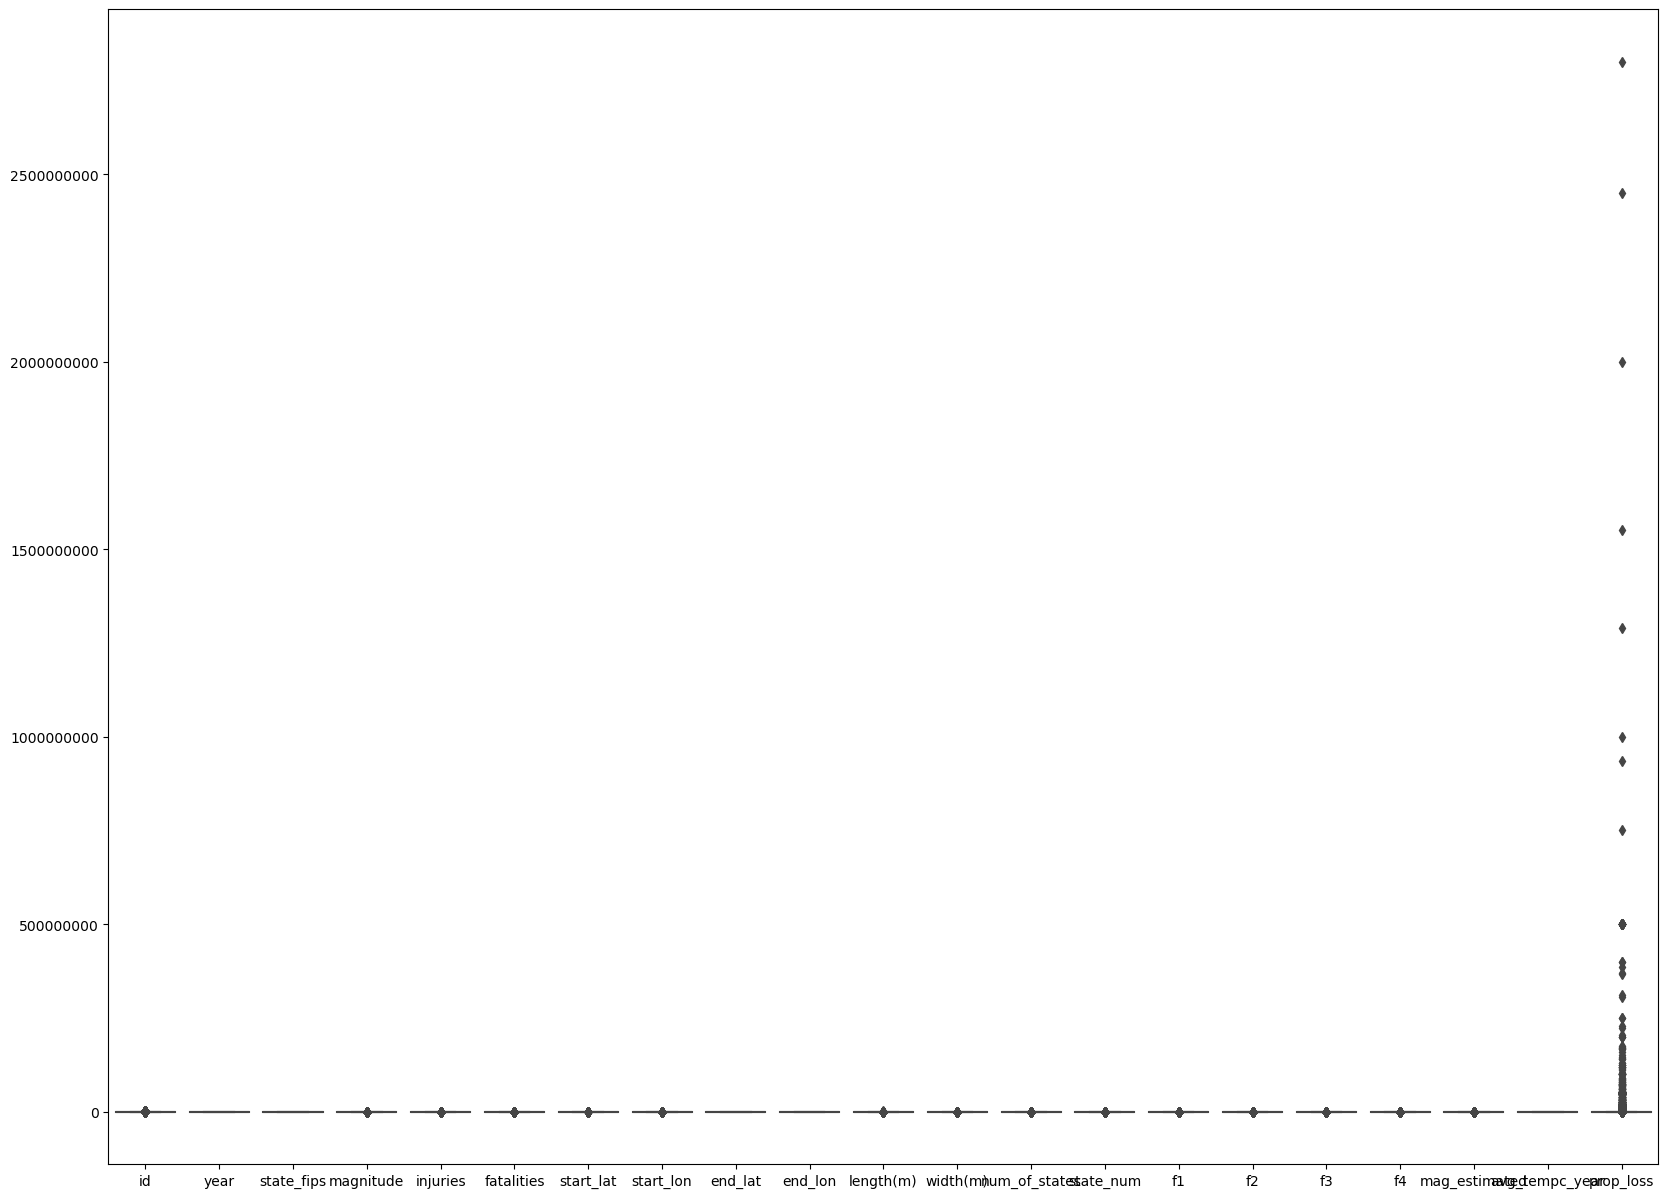

In [25]:
# Set the figure size
fig_size(20,15)

# Disable scientific notation
large_axis_numbers()

# Create a box plot with Seaborn
sns.boxplot(data=clean_df)

Appears to be several outliers in the prop_loss column, a strong tornado could cause a large amount of damage,
so there may be no reason to remove them.

<AxesSubplot: xlabel='magnitude', ylabel='prop_loss'>

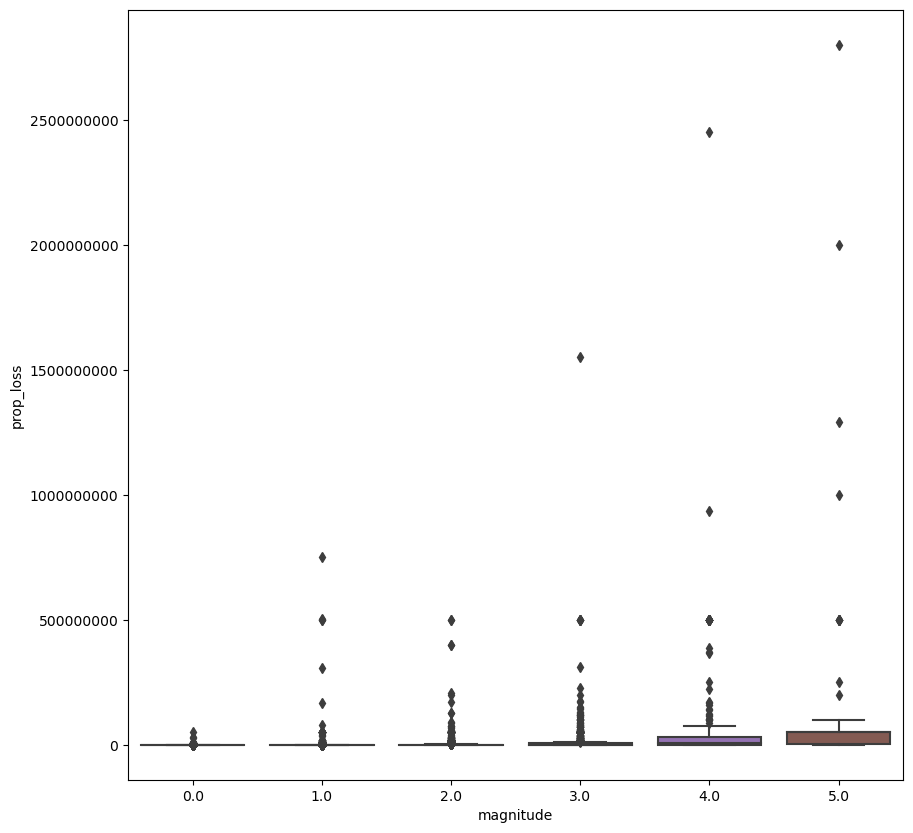

In [26]:
# Set the figure size
fig_size(10,10)

# Function to disable scientific notation
large_axis_numbers()

# Create boxplot with Seaborn
sns.boxplot(data=clean_df,y='prop_loss', x='magnitude')

In [27]:
# Calculate the correlation matrix
corr = clean_df[['year','magnitude','injuries','fatalities','prop_loss','length(m)','width(m)','avg_tempc_year']].corr()

In [28]:
corr

,year,magnitude,injuries,fatalities,prop_loss,length(m),width(m),avg_tempc_year
year,1.000000,-0.296112,-0.041385,-0.034142,0.008501,-0.069493,0.106594,0.637456
magnitude,-0.296112,1.000000,0.221748,0.195629,0.135889,0.439056,0.418881,-0.183591
injuries,-0.041385,0.221748,1.000000,0.759500,0.528142,0.251364,0.185530,-0.022850
fatalities,-0.034142,0.195629,0.759500,1.000000,0.480132,0.229922,0.171601,-0.010989
prop_loss,0.008501,0.135889,0.528142,0.480132,1.000000,0.146554,0.171335,-0.001080
length(m),-0.069493,0.439056,0.251364,0.229922,0.146554,1.000000,0.364955,-0.025477
width(m),0.106594,0.418881,0.185530,0.171601,0.171335,0.364955,1.000000,0.076519
avg_tempc_year,0.637456,-0.183591,-0.022850,-0.010989,-0.001080,-0.025477,0.076519,1.000000


In [29]:
# List the datatypes of the columns of the Dataframe
clean_df.dtypes

id                  int64
year                int64
date               object
time               object
timezone           object
datetime_utc       object
state              object
state_fips          int64
magnitude         float64
injuries            int64
fatalities          int64
start_lat         float64
start_lon         float64
end_lat           float64
end_lon           float64
length(m)         float64
width(m)          float64
num_of_states       int64
state_num           int64
f1                  int64
f2                  int64
f3                  int64
f4                  int64
mag_estimated        bool
avg_tempc_year    float64
prop_loss         float64
dtype: object

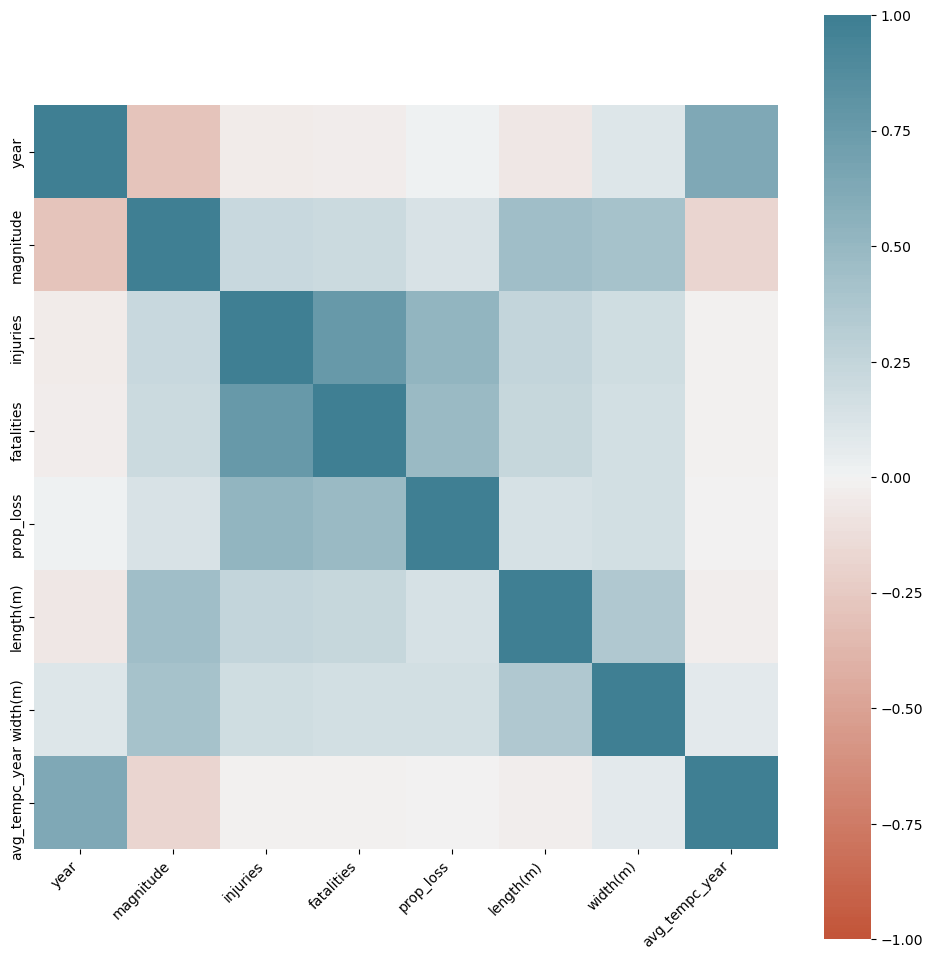

In [30]:
# Set the figure size
fig_size(12,12)

# Create heatmap with Seaborn
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
# Customize the x-axis tick labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [31]:
clean_df[['year', 'prop_loss']].head()

,year,prop_loss
0,1950,50000.0
1,1950,500000.0
2,1950,500000.0
3,1950,500000.0
4,1950,50000.0


<AxesSubplot: xlabel='year', ylabel='prop_loss'>

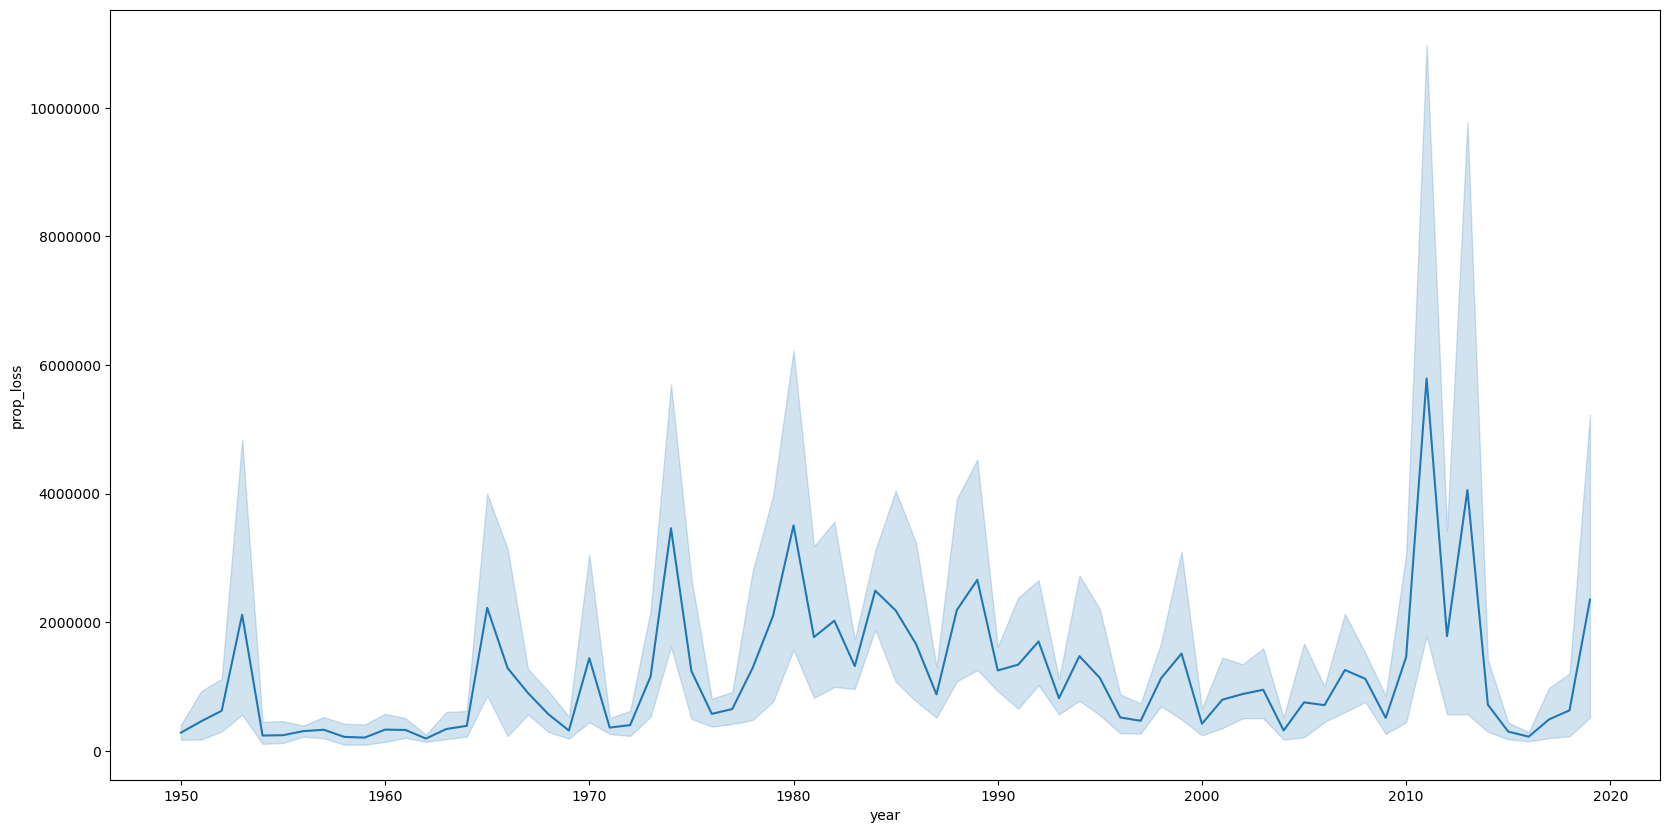

In [32]:
# Set the figure size
fig_size(20,10)

# Function to disable scientific notation
large_axis_numbers()

x_value = clean_df['year'].values
y_value = clean_df['prop_loss'].values

# print(type(x_value))

# Create lineplot with Seaborn
sns.lineplot(data=clean_df,x='year',y='prop_loss')
# sns.lineplot(x=x_value,y=x_value)


<AxesSubplot: xlabel='year', ylabel='Count'>

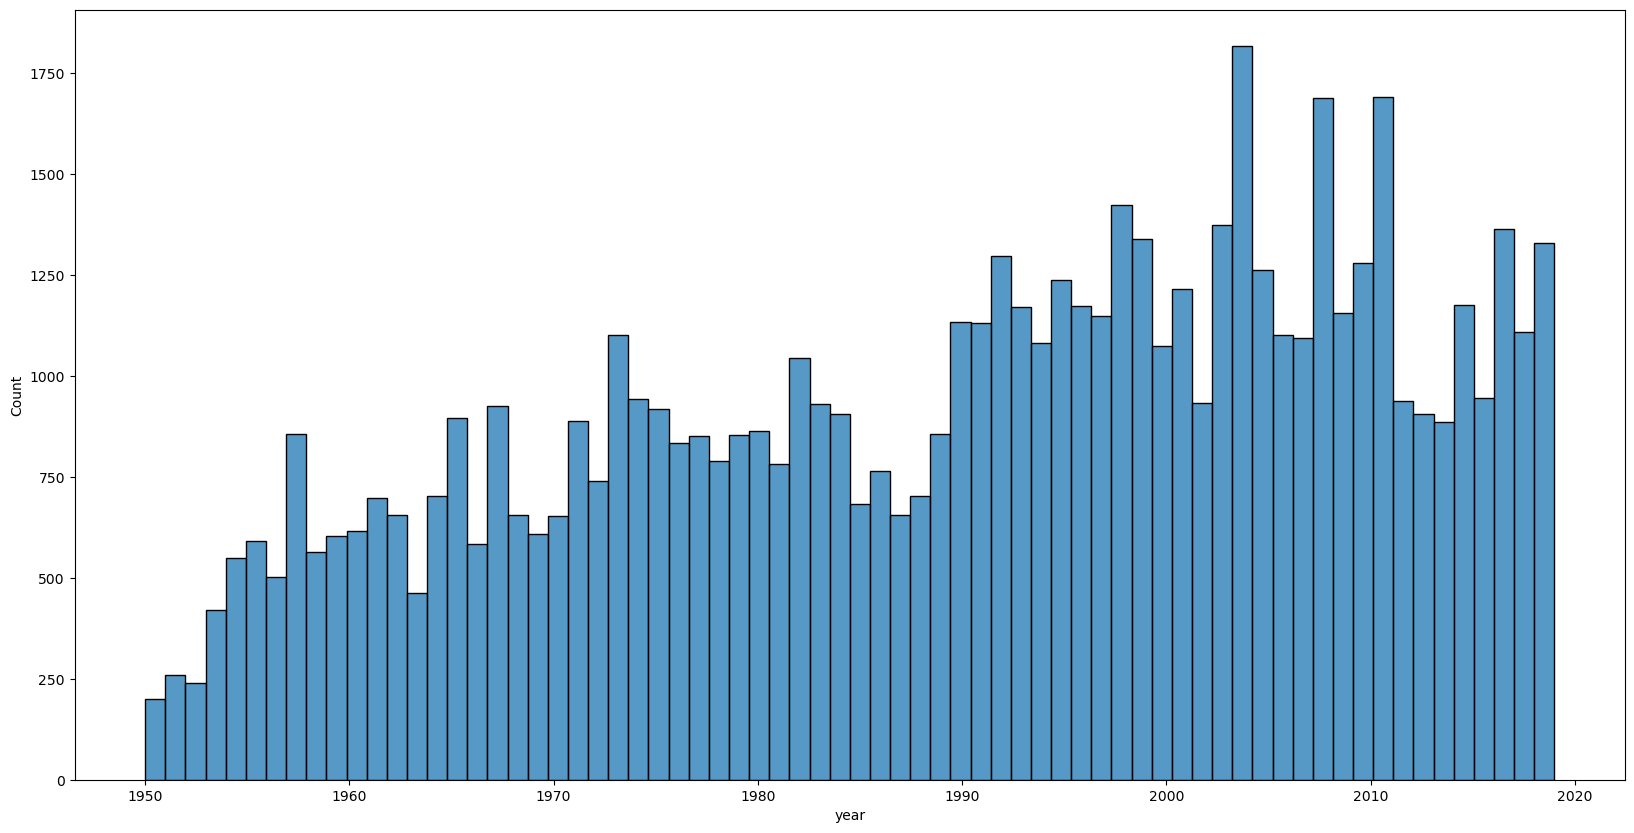

In [33]:
# Set figure size
fig_size(20,10)

# Function to disable scientific notation
large_axis_numbers()

# Create histogram with Seaborn
sns.histplot(data=clean_df,x='year',bins=70)

<AxesSubplot: xlabel='state', ylabel='Count'>

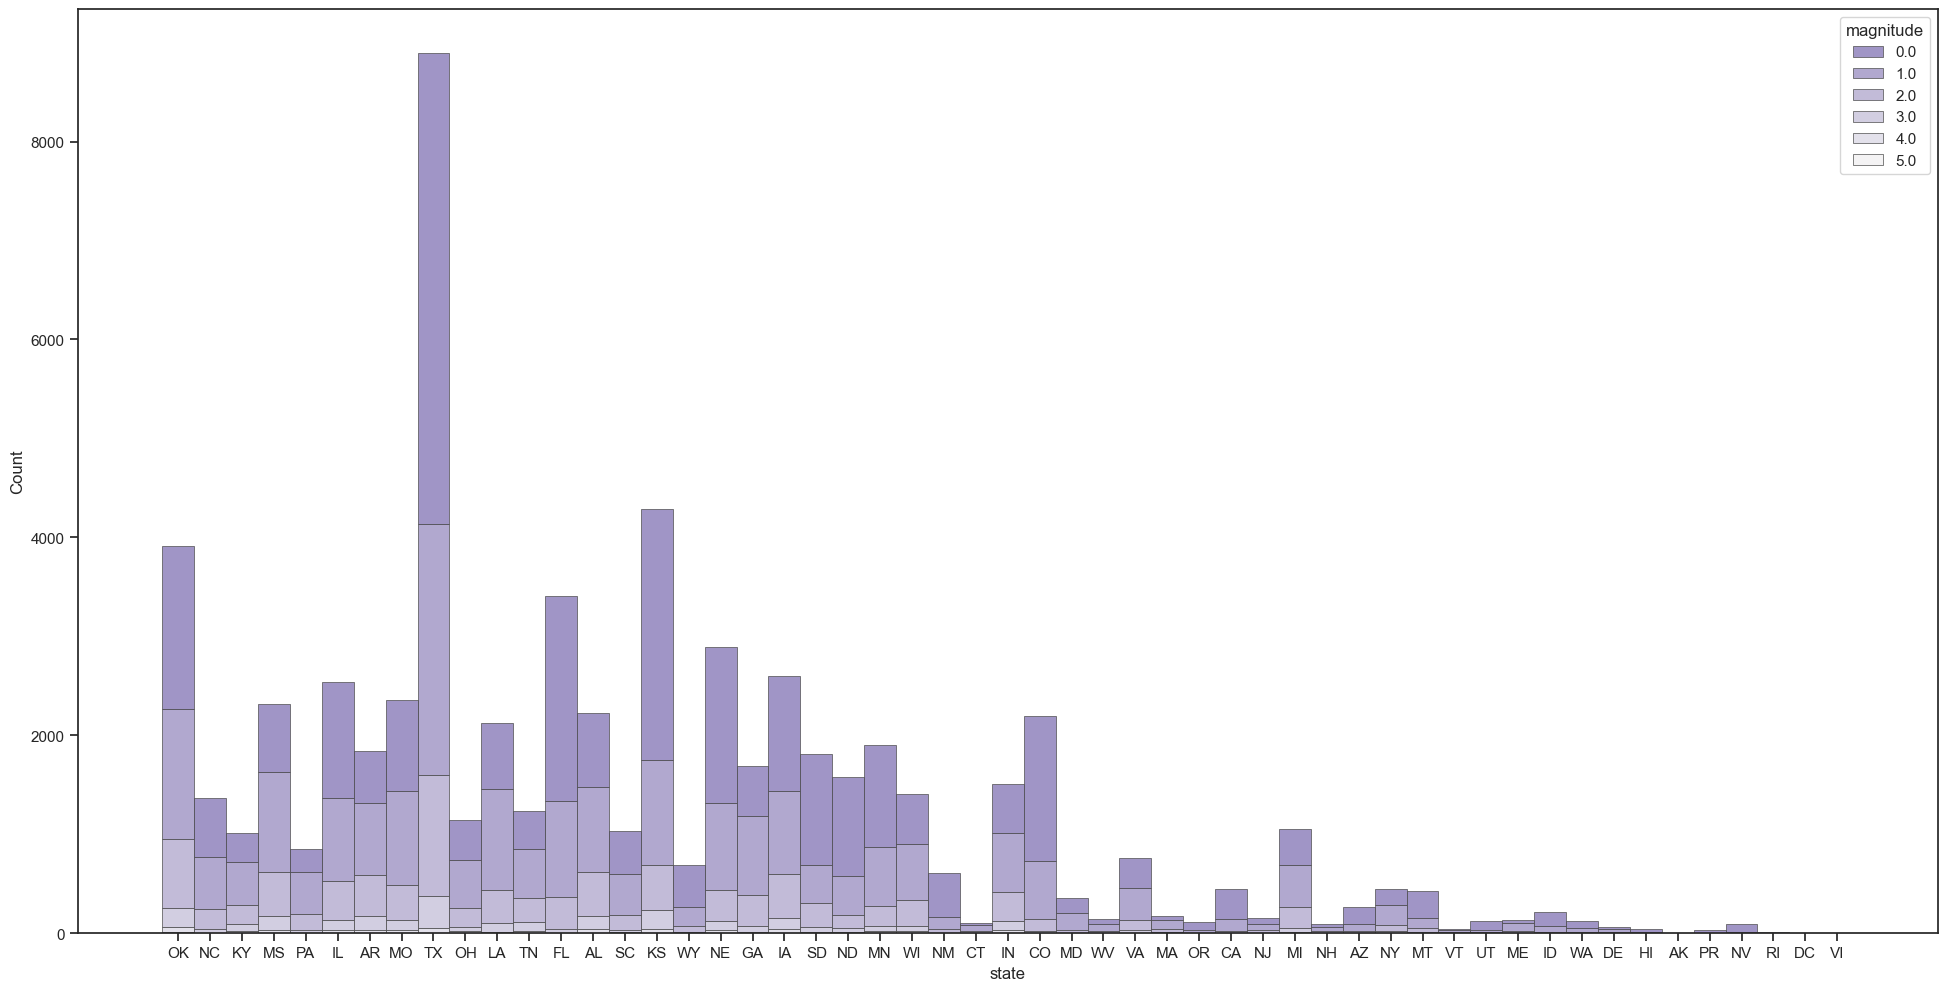

In [34]:
# Set Seaboen theme
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(24, 12))

# Create histogram with Seaborn
sns.histplot(
    clean_df,
    x=clean_df['state'], hue="magnitude",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5)

<AxesSubplot: xlabel='year', ylabel='avg_tempc_year'>

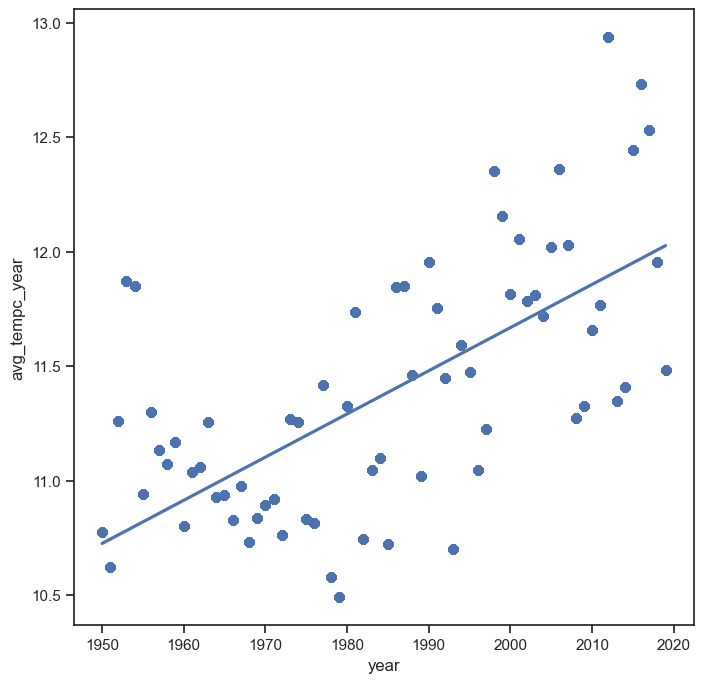

In [35]:
# Set figure size
fig_size(8,8)

# Create regression plot with Seaborn
sns.regplot(data=clean_df, x='year', y='avg_tempc_year')

<AxesSubplot: xlabel='year', ylabel='fatalities'>

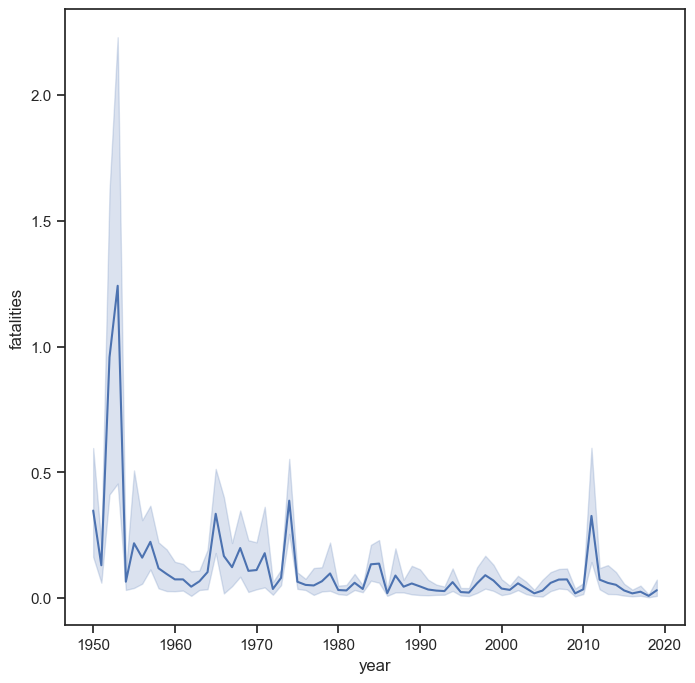

In [36]:
# Set figure size
fig_size(8,8)

# Function to disable scientific notation
large_axis_numbers()

# Create line plot with Seaborn
sns.lineplot(data=clean_df, x='year', y='fatalities')

<AxesSubplot:xlabel='magnitude', ylabel='prop_loss'>

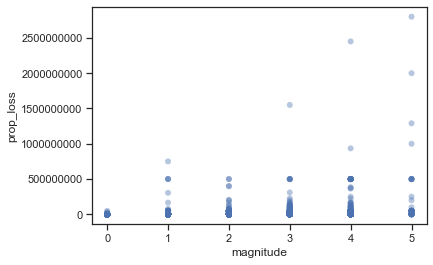

In [28]:
# test: how does removing prop loss nan's
temp_df = clean_df.dropna(subset=['prop_loss'])
large_axis_numbers()
sns.scatterplot(data=temp_df, y="prop_loss", x="magnitude", edgecolor = 'none'
                ,alpha = .4)

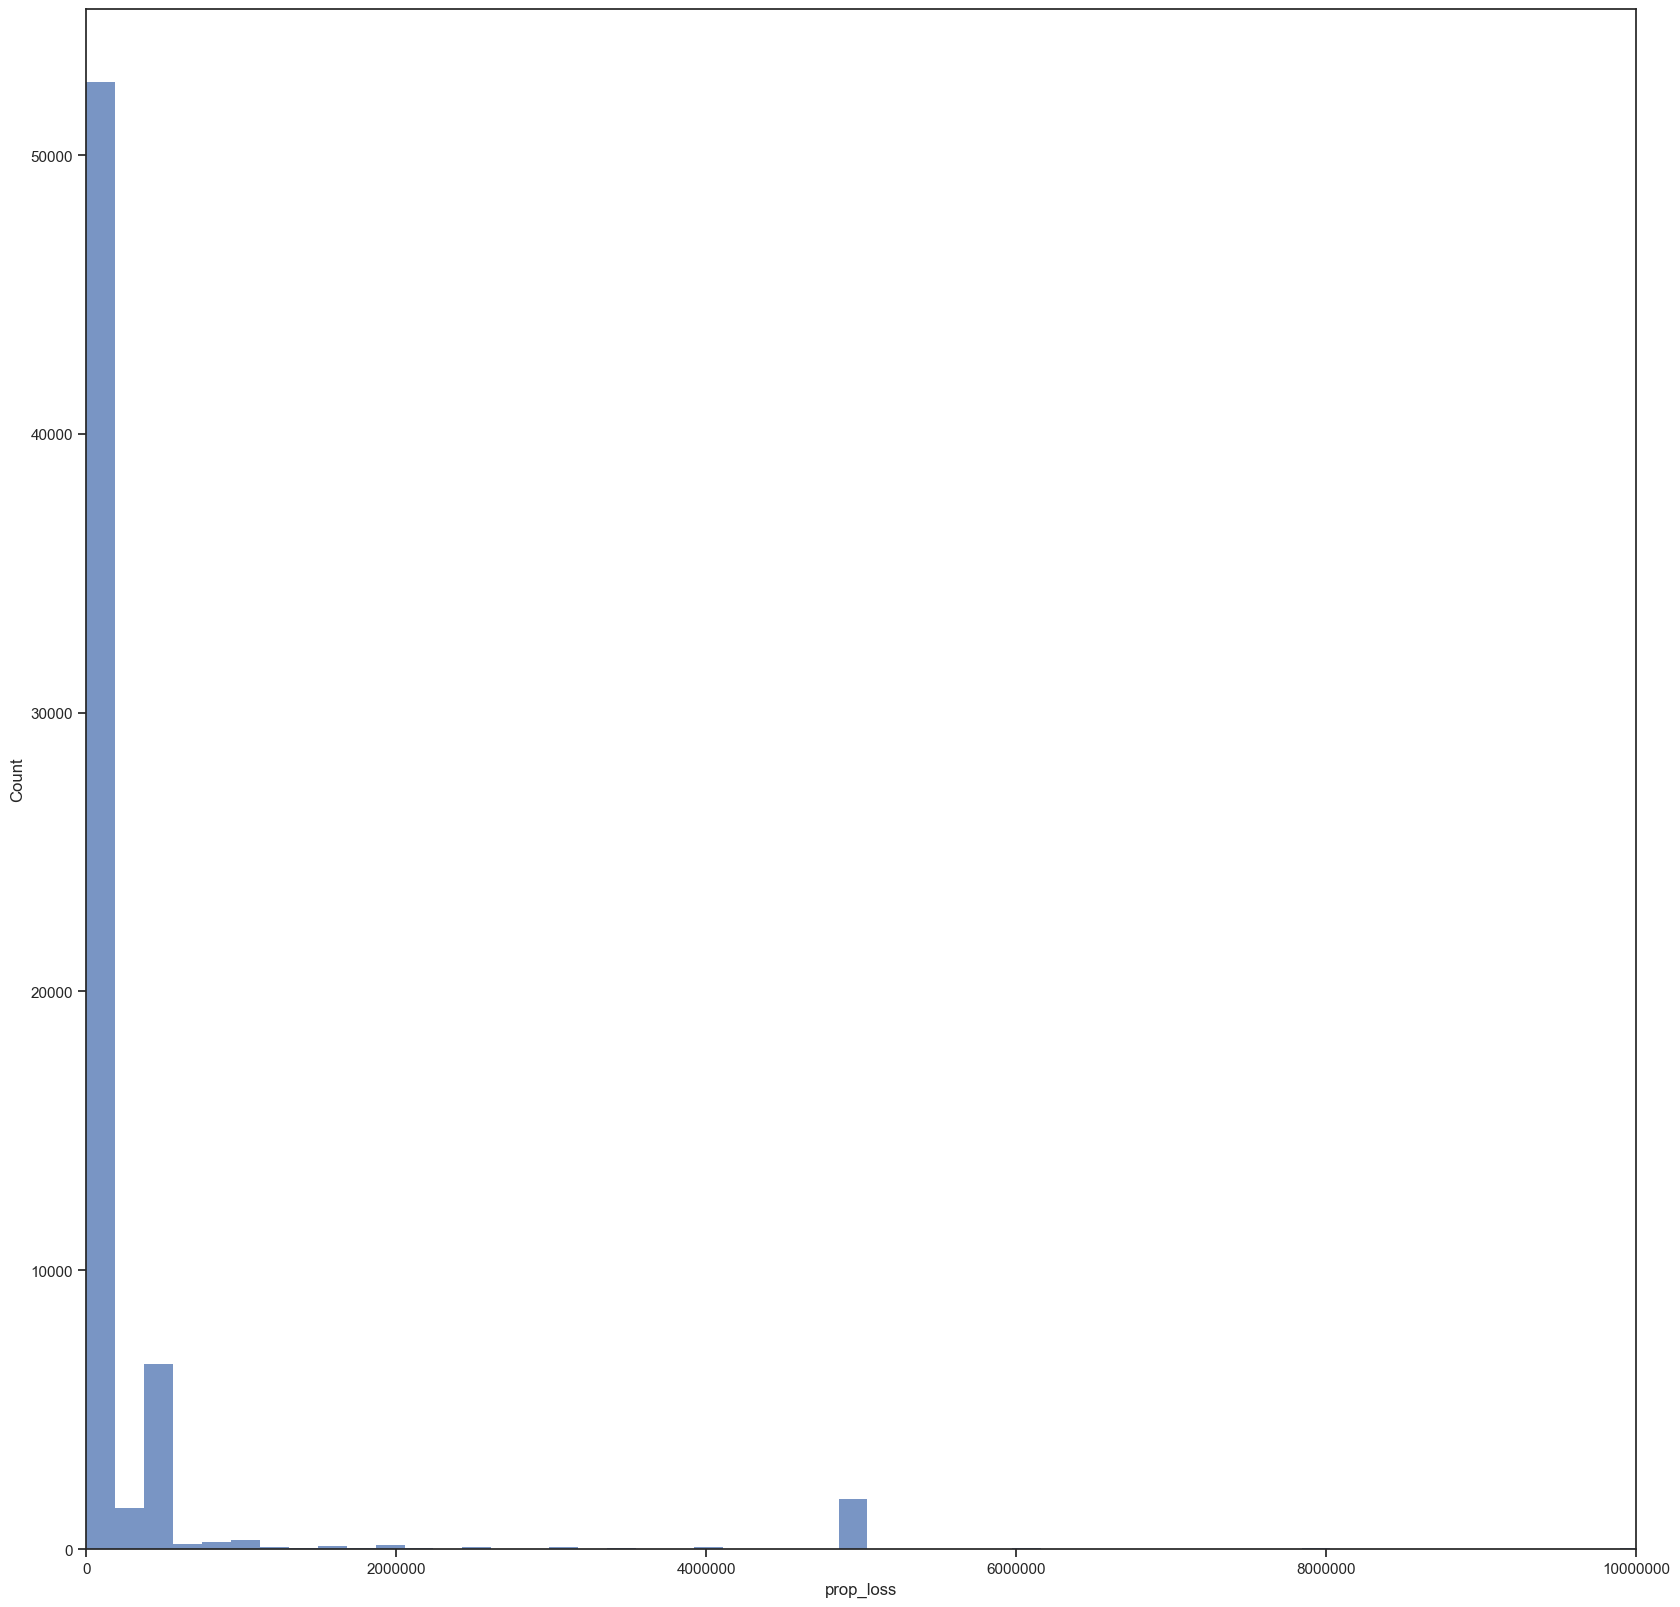

In [39]:
# histogram of property loss values 
fig_size(20,20)
large_axis_numbers()
data = clean_df['prop_loss']
plot = sns.histplot(data=clean_df, x=data, bins=15000)
plot.set_xlim(0, 10000000)
plt.show()